In [ ]:
# california house price prediction ---- exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("../data/raw/housing.csv")

In [5]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [26]:
df["total_bedrooms"].isnull().sum()
median_bedroom=df["total_bedrooms"].median()
print(median_bedroom)
df["total_bedrooms"]=df["total_bedrooms"].fillna(median_bedroom)

435.0


In [27]:
df["total_bedrooms"].isnull().sum()


np.int64(0)

In [28]:
df.duplicated().sum()

np.int64(0)

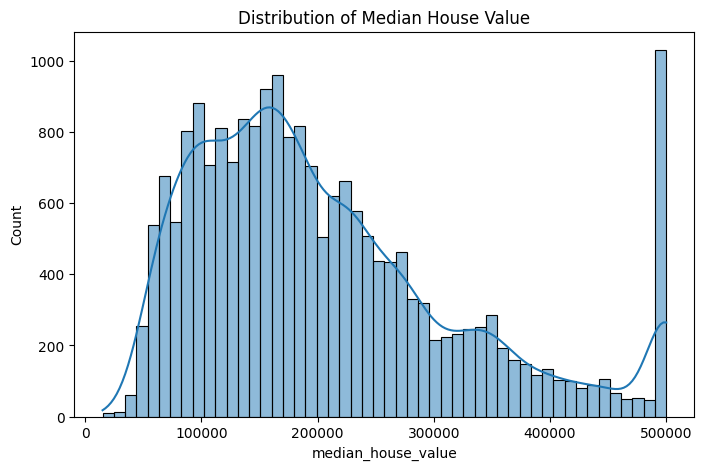

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df["median_house_value"], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.show()


In [13]:
df["median_house_value"].skew()


np.float64(0.9777632739098342)

In [14]:
df["median_house_value"].describe()


count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

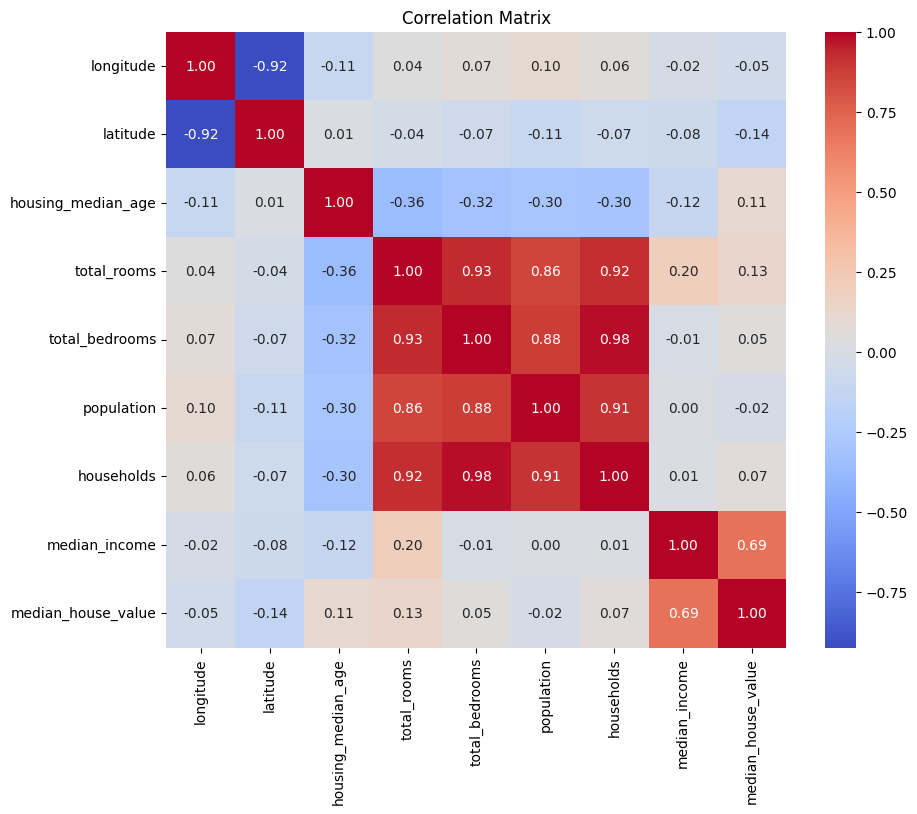

In [15]:
plt.figure(figsize=(10,8))
correlation = df.corr(numeric_only=True)

sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


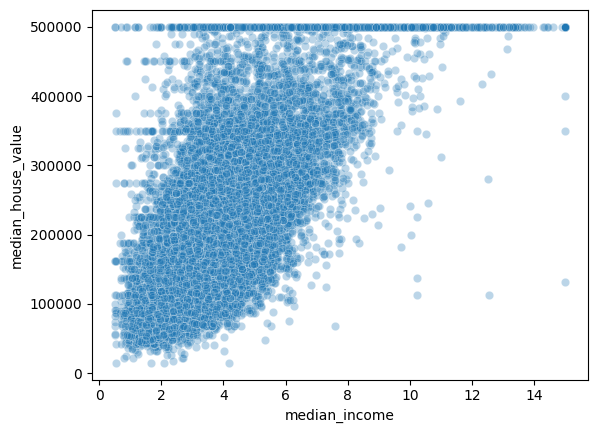

In [16]:
sns.scatterplot(x="median_income", y="median_house_value", data=df, alpha=0.3)
plt.show()


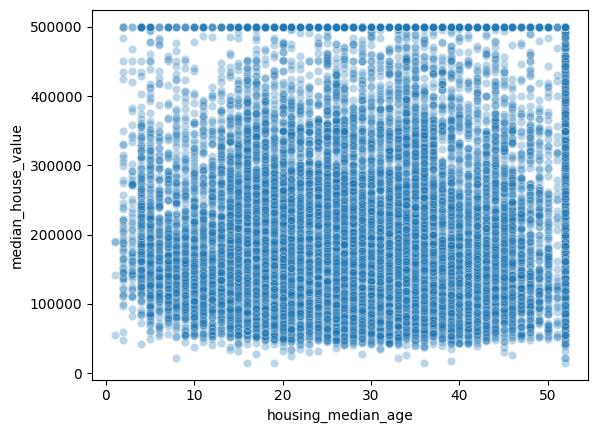

In [17]:
sns.scatterplot(x="housing_median_age", y="median_house_value", data=df, alpha=0.3)
plt.show()


In [18]:
df["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

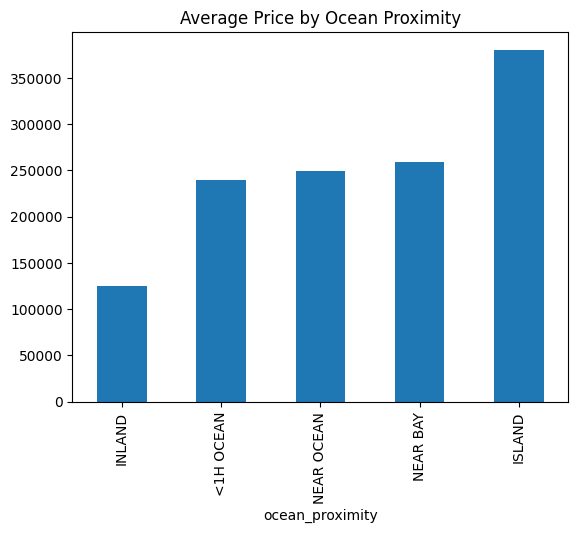

In [19]:
df.groupby("ocean_proximity")["median_house_value"].mean().sort_values().plot(kind="bar")
plt.title("Average Price by Ocean Proximity")
plt.show()


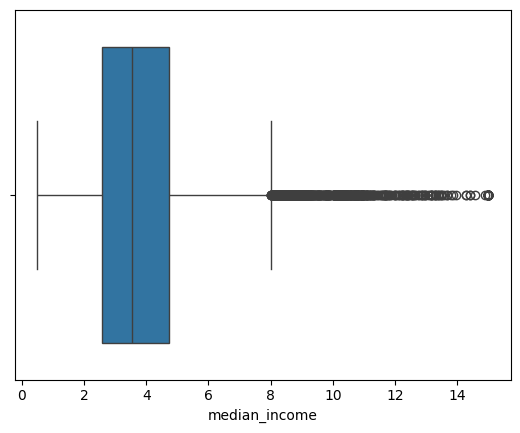

In [20]:
sns.boxplot(x=df["median_income"])
plt.show()


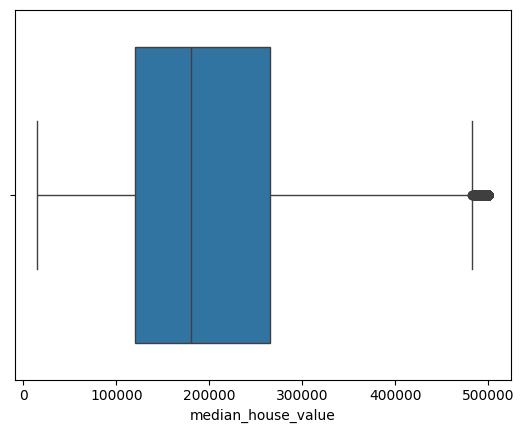

In [21]:
sns.boxplot(x=df["median_house_value"])
plt.show()


In [33]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)


KeyError: "None of [Index(['ocean_proximity'], dtype='str')] are in the [columns]"

In [67]:
df = df.drop([
    "rooms_per_household",
    "bedrooms_per_room",
    "population_per_household"
], axis=1)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [68]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [69]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [70]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [74]:
y_pred = model.predict(X_test_scaled)


In [75]:
y_pred

array([ 54055.44889898, 124225.33893718, 255489.37949166, ...,
       439180.98341181, 120797.55240621, 183386.04993584], shape=(4128,))

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 4908476721.156617
R2 Score: 0.6254240620553605


In [77]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross Validation R2:", scores.mean())

Cross Validation R2: 0.6475421158367078


In [78]:
coeff_df = pd.DataFrame(
    model.coef_,
    X.columns,
    columns=["Coefficient"]
)

coeff_df.sort_values(by="Coefficient", ascending=False)


,Coefficient
median_income,75167.774766
total_bedrooms,43068.181842
households,18382.196324
housing_median_age,13889.866189
ocean_proximity_ISLAND,2118.437572
ocean_proximity_NEAR OCEAN,1139.905592
ocean_proximity_NEAR BAY,-1621.705018
total_rooms,-13094.251162
ocean_proximity_INLAND,-18506.095225
population,-43403.432427


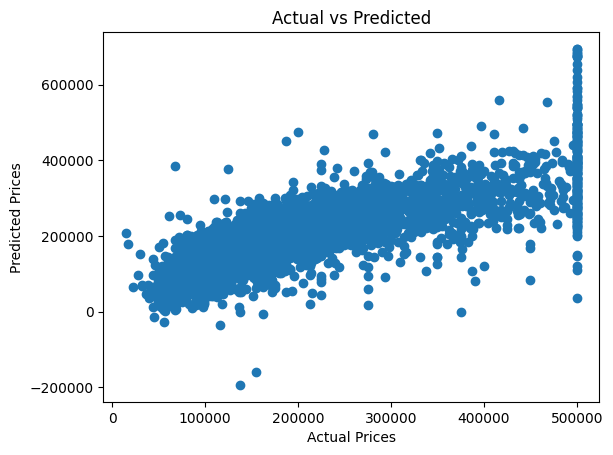

In [79]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()


In [82]:
for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    print(f"Alpha: {alpha}, R2: {ridge.score(X_test_scaled, y_test)}")

Alpha: 0.01, R2: 0.6254243963291042
Alpha: 0.1, R2: 0.6254274027214888
Alpha: 1, R2: 0.625457262584054
Alpha: 10, R2: 0.6257364071110388
Alpha: 100, R2: 0.6272275479583751


In [84]:
for alpha in [0.001, 0.01, 0.1, 1,100]:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    print(f"Alpha: {alpha}, R2: {lasso.score(X_test_scaled, y_test)}")


Alpha: 0.001, R2: 0.6254240692438391
Alpha: 0.01, R2: 0.6254241338809872
Alpha: 0.1, R2: 0.6254247811616008
Alpha: 1, R2: 0.6254312334082689
Alpha: 100, R2: 0.6260273889028423
